# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [9]:
model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same')) 
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 32)      1568      
_________________________________________________________________
batch_normalization_11 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
activation_11 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 128)     16512     
_________________________________________________________________
batch_normalization_12 (Batc (None, 112, 112, 128)     512       
_________________________________________________________________
activation_12 (Activation)   (None, 112, 112, 128)     0         
__________

### Train

In [11]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch33.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=200,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=100,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Epoch 1/200
200/200 [==============================] - 139s 694ms/step - loss: 5.3482 - acc: 0.0148 - val_loss: 6.2920 - val_acc: 0.0151

Epoch 00001: val_loss improved from inf to 6.29197, saving model to Saved_Models/weights.best.from_scratch33.hdf5
Epoch 2/200
200/200 [==============================] - 129s 647ms/step - loss: 5.0793 - acc: 0.0259 - val_loss: 5.7482 - val_acc: 0.0234

Epoch 00002: val_loss improved from 6.29197 to 5.74822, saving model to Saved_Models/weights.best.from_scratch33.hdf5
Epoch 3/200
200/200 [==============================] - 134s 668ms/step - loss: 4.9248 - acc: 0.0364 - val_loss: 5.2752 - val_acc: 0.0270

Epoch 00003: val_loss improved from 5.74822 to 5.27522, saving model to Saved_Models/weights.best.from_scratch33.hdf5
Epoch 4/200
200/200 [==============================] - 132s 658ms/step - loss: 4.8471 - acc: 0.0408 - val_loss: 5.3397 - val_acc: 0.0289

Epoch 00004: val_loss did not improve from 5.27522
Epoch 5/200
200/200 [==========================


Epoch 00039: val_loss did not improve from 4.12700
Epoch 40/200
200/200 [==============================] - 143s 716ms/step - loss: 2.5383 - acc: 0.3872 - val_loss: 4.7564 - val_acc: 0.1189

Epoch 00040: val_loss did not improve from 4.12700
Epoch 41/200
200/200 [==============================] - 137s 685ms/step - loss: 2.4988 - acc: 0.3991 - val_loss: 4.7202 - val_acc: 0.1387

Epoch 00041: val_loss did not improve from 4.12700
Epoch 42/200
200/200 [==============================] - 136s 680ms/step - loss: 2.4591 - acc: 0.4075 - val_loss: 5.2875 - val_acc: 0.1139

Epoch 00042: val_loss did not improve from 4.12700
Epoch 43/200
200/200 [==============================] - 137s 687ms/step - loss: 2.3946 - acc: 0.4159 - val_loss: 4.1564 - val_acc: 0.1730

Epoch 00043: val_loss did not improve from 4.12700
Epoch 44/200
200/200 [==============================] - 137s 687ms/step - loss: 2.3712 - acc: 0.4106 - val_loss: 4.3343 - val_acc: 0.1748

Epoch 00044: val_loss did not improve from 4.1270


Epoch 00082: val_loss did not improve from 3.95579
Epoch 83/200
200/200 [==============================] - 131s 654ms/step - loss: 0.8570 - acc: 0.7672 - val_loss: 4.6131 - val_acc: 0.2292

Epoch 00083: val_loss did not improve from 3.95579
Epoch 84/200
200/200 [==============================] - 139s 694ms/step - loss: 0.8465 - acc: 0.7705 - val_loss: 4.2266 - val_acc: 0.2497

Epoch 00084: val_loss did not improve from 3.95579
Epoch 85/200
200/200 [==============================] - 131s 654ms/step - loss: 0.8096 - acc: 0.7786 - val_loss: 4.7425 - val_acc: 0.2218

Epoch 00085: val_loss did not improve from 3.95579
Epoch 86/200
200/200 [==============================] - 131s 655ms/step - loss: 0.8094 - acc: 0.7795 - val_loss: 5.1107 - val_acc: 0.1906

Epoch 00086: val_loss did not improve from 3.95579
Epoch 87/200
200/200 [==============================] - 132s 660ms/step - loss: 0.7583 - acc: 0.7936 - val_loss: 5.3859 - val_acc: 0.2025

Epoch 00087: val_loss did not improve from 3.9557


Epoch 00125: val_loss did not improve from 3.95579
Epoch 126/200
200/200 [==============================] - 131s 657ms/step - loss: 0.3206 - acc: 0.9084 - val_loss: 5.2161 - val_acc: 0.2434

Epoch 00126: val_loss did not improve from 3.95579
Epoch 127/200
200/200 [==============================] - 131s 654ms/step - loss: 0.3183 - acc: 0.9134 - val_loss: 4.6965 - val_acc: 0.2711

Epoch 00127: val_loss did not improve from 3.95579
Epoch 128/200
200/200 [==============================] - 131s 657ms/step - loss: 0.3017 - acc: 0.9130 - val_loss: 4.4850 - val_acc: 0.3022

Epoch 00128: val_loss did not improve from 3.95579
Epoch 129/200
200/200 [==============================] - 132s 659ms/step - loss: 0.3006 - acc: 0.9147 - val_loss: 4.5548 - val_acc: 0.2733

Epoch 00129: val_loss did not improve from 3.95579
Epoch 130/200
200/200 [==============================] - 131s 657ms/step - loss: 0.2950 - acc: 0.9153 - val_loss: 5.3014 - val_acc: 0.2462

Epoch 00130: val_loss did not improve from 3


Epoch 00168: val_loss did not improve from 3.95579
Epoch 169/200
200/200 [==============================] - 131s 653ms/step - loss: 0.1841 - acc: 0.9452 - val_loss: 5.2394 - val_acc: 0.2959

Epoch 00169: val_loss did not improve from 3.95579
Epoch 170/200
200/200 [==============================] - 131s 655ms/step - loss: 0.1771 - acc: 0.9517 - val_loss: 4.7822 - val_acc: 0.3032

Epoch 00170: val_loss did not improve from 3.95579
Epoch 171/200
200/200 [==============================] - 132s 658ms/step - loss: 0.1930 - acc: 0.9470 - val_loss: 6.2256 - val_acc: 0.2135

Epoch 00171: val_loss did not improve from 3.95579
Epoch 172/200
200/200 [==============================] - 131s 656ms/step - loss: 0.1712 - acc: 0.9513 - val_loss: 5.3735 - val_acc: 0.2701

Epoch 00172: val_loss did not improve from 3.95579
Epoch 173/200
200/200 [==============================] - 131s 654ms/step - loss: 0.1843 - acc: 0.9489 - val_loss: 4.8931 - val_acc: 0.3028

Epoch 00173: val_loss did not improve from 3

In [12]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,6.291969,0.015094,5.349715,0.014909
1,1.0,5.748218,0.023418,5.080847,0.026051
2,2.0,5.275225,0.027044,4.925596,0.035468
3,3.0,5.339747,0.028931,4.847283,0.040960
4,4.0,5.051052,0.034177,4.750892,0.050847
5,5.0,5.036311,0.040881,4.683934,0.054771
6,6.0,5.352105,0.044969,4.587163,0.066227
7,7.0,4.975912,0.040823,4.522668,0.073760
8,8.0,4.809913,0.054088,4.448574,0.084174
9,9.0,5.002324,0.049371,4.368723,0.090866


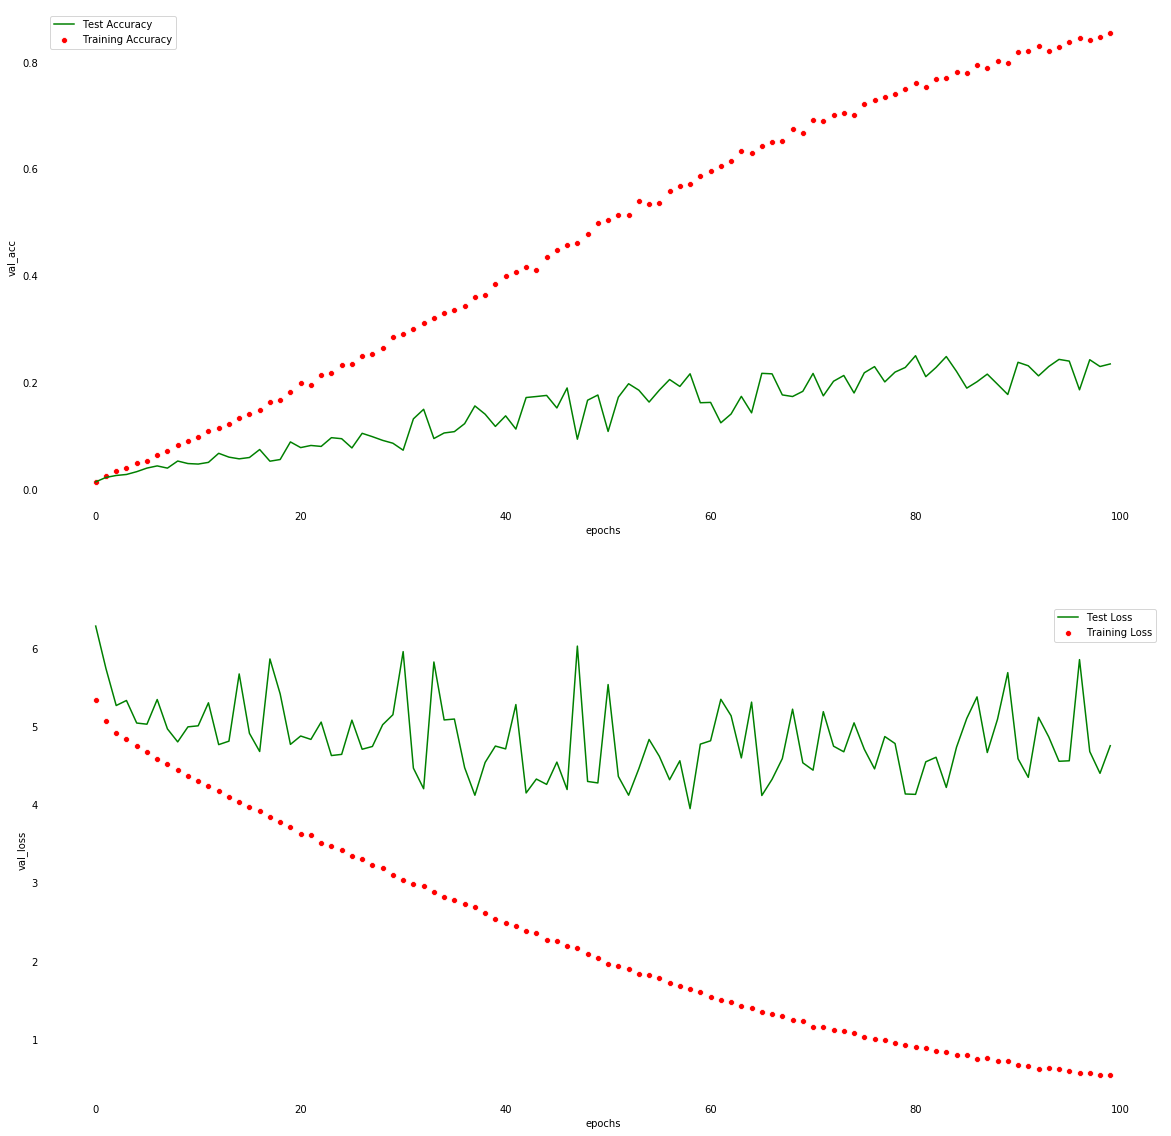

In [13]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters